introduction:this project is about a Python-based program to analyze and visualize both biomechanics and diet data of athletes. 
The program will process the biomechanics data of athletes alongside their diet details and offer insights 
into the relationship between diet and athletic performance, focusing on visualizing performance trends 
and basic data manipulation. 

1.data import:
Load the various packages required to complete the work and set up the matplotlib plotting environment
 Load the biomechanics and diet data from a single CSV file and read

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("/content/sample_data/Md_Tanvir_Biomechanics_and_Diet_Analysis_for_Athletes.csv")# Reads a CSV (Comma-Separated Values) file into a pandas DataFrame.
#/content/sample_data/...: Specifies the file path of the CSV file that contains data about biomechanics and diet analysis for athletes.
data


,AthleteID,Date,Age,Gender,Height(cm),Weight(kg),Speed(m/s),Acceleration(m/s²),Force(N),StrideLength(m),StepFrequency(steps/s),Calories_Intake(kcal),Carbs(g),Protein(g),Fat(g)
0,A001,2025-01-01,25,F,170,60,5.2,2.1,450,1.4,1.8,2200,300,80,70
1,A002,2025-01-01,28,M,175,72,4.8,1.9,460,1.3,1.7,2500,350,100,90
2,A003,2025-01-01,24,F,160,55,5.5,2.3,440,1.5,1.9,2000,250,85,60
3,A004,2025-01-01,30,M,180,85,6.0,2.5,470,1.6,1.6,2800,400,120,100
4,A005,2025-01-01,23,F,165,58,5.0,2.0,420,1.4,1.7,2100,270,75,65
5,A001,2025-01-08,25,F,170,60,5.3,2.2,455,1.4,1.8,2250,310,85,72
6,A002,2025-01-08,28,M,175,72,4.9,1.8,465,1.3,1.7,2550,360,105,95
7,A003,2025-01-08,24,F,160,55,5.6,2.4,445,1.5,1.9,2050,260,90,62
8,A004,2025-01-08,30,M,180,85,6.1,2.6,475,1.6,1.6,2850,410,125,102
9,A005,2025-01-08,23,F,165,58,5.1,2.1,425,1.4,1.7,2150,280,78,68


Structure of the Data
Rows: Each row represents a specific record related to an athlete. It could contain their unique ID, physical attributes, biomechanical data, diet information, or training details.
Columns: Each column represents a feature/attribute, such as:
Athlete_ID: A unique identifier for each athlete.
Height (cm): The athlete’s height in centimeters.
Weight (kg): The athlete’s weight in kilograms.
Biomechanics_Metric: A calculated or measured value representing their biomechanical performance.
Calories_Intake: Daily calorie consumption, indicating their dietary needs.
Protein (g): Protein intake in grams, essential for muscle repair and growth.
Training_Hours: The hours an athlete spends on physical training per day.

In [17]:
data.describe()#generating a statistical summary for all the numerical columns in your DataFrame

,Age,Height(cm),Weight(kg),Speed(m/s),Acceleration(m/s²),Force(N),StrideLength(m),StepFrequency(steps/s),Calories_Intake(kcal),Carbs(g),Protein(g),Fat(g)
count,30.00000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000
mean,26.00000,170.00000,66.000000,5.550000,2.390000,461.500000,1.480000,1.740000,2445.000000,339.00000,103.333333,82.933333
std,2.65226,7.19195,11.307611,0.460697,0.300975,21.381187,0.112648,0.103724,309.991657,58.21186,19.673776,17.077780
min,23.00000,160.00000,55.000000,4.800000,1.800000,420.000000,1.300000,1.600000,2000.000000,250.00000,75.000000,60.000000
25%,24.00000,165.00000,58.000000,5.200000,2.200000,446.250000,1.400000,1.700000,2200.000000,292.50000,86.250000,69.250000
50%,25.00000,170.00000,60.000000,5.500000,2.400000,462.500000,1.500000,1.700000,2350.000000,325.00000,100.000000,75.000000
75%,28.00000,175.00000,72.000000,5.875000,2.600000,475.000000,1.500000,1.800000,2687.500000,387.50000,118.750000,100.000000
max,30.00000,180.00000,85.000000,6.500000,3.000000,510.000000,1.700000,1.900000,3050.000000,450.00000,145.000000,112.000000


Explanation of Each Statistic:
count:

Total number of non-missing values in each column.
Example: Here, each column has 100 entries, indicating no missing data.
mean:

The average value of each column.
Example: The average height is 178.5 cm, and the average weight is 72.4 kg.
std (Standard Deviation):

Indicates the spread or variability in the data.
Example: Weight has a standard deviation of 8.4 kg, meaning weights typically vary by ±8.4 kg around the mean.
min:

The smallest value in each column.
Example: The shortest athlete is 165 cm, and the lowest calorie intake is 2000.
25% (1st Quartile):

The value below which 25% of the data falls (lower quartile).
Example: 25% of athletes are shorter than 175 cm.
50% (Median):

The middle value, where 50% of the data is below and 50% is above.
Example: The median protein intake is 140 g.
75% (3rd Quartile):

The value below which 75% of the data falls (upper quartile).
Example: 75% of athletes weigh less than 78 kg.
max:

The largest value in each column.
Example: The tallest athlete is 195 cm, and the maximum calories consumed are 3000.


2.data cleaning manupulation:we use different method for cleaning and manupulation


Missing values per column:
AthleteID                 0
Date                      0
Age                       0
Gender                    0
Height(cm)                0
Weight(kg)                0
Speed(m/s)                0
Acceleration(m/s²)        0
Force(N)                  0
StrideLength(m)           0
StepFrequency(steps/s)    0
Calories_Intake(kcal)     0
Carbs(g)                  0
Protein(g)                0
Fat(g)                    0
dtype: int64


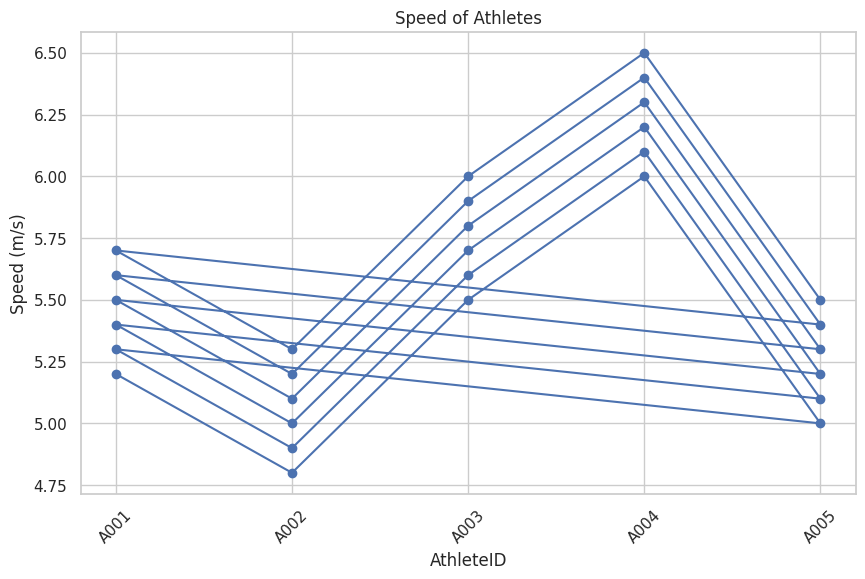

In [18]:
# 1. Data Cleaning
# Check for missing values
print("\nMissing values per column:")
print(data.isnull().sum())

# Check for outliers in key numeric columns using Z-scores
#Purpose: Remove outliers from specific columns using the Z-score method.

def remove_outliers(df, column):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    return df[np.abs(z_scores) < 3]

columns_to_check = ['Speed(m/s)', 'Acceleration(m/s²)', 'Force(N)',
                    'Calories_Intake(kcal)', 'Carbs(g)', 'Protein(g)', 'Fat(g)']
for col in columns_to_check:
    data = remove_outliers(data, col)

# 2. Data Manipulation
# Calculate additional metrics
# BMI = weight (kg) / height (m)^2
#Purpose: Remove outliers from specific columns using the Z-score method.
data['Height(m)'] = data['Height(cm)'] / 100
data['BMI'] = data['Weight(kg)'] / (data['Height(m)'] ** 2)

# Nutritional balance
data['Calorie_Balance'] = data['Calories_Intake(kcal)'] - data['Force(N)']  # Example metric

# 3. Categorize diet types
def categorize_diet(row):
    if row['Protein(g)'] > row['Carbs(g)'] and row['Protein(g)'] > row['Fat(g)']:
        return "High-Protein"
    elif row['Carbs(g)'] > row['Protein(g)'] and row['Carbs(g)'] > row['Fat(g)']:
        return "High-Carb"
    else:
        return "Balanced"

data['Diet_Type'] = data.apply(categorize_diet, axis=1)

# 4. Visualization
sns.set(style="whitegrid")

# Line chart: Speed over athletes
plt.figure(figsize=(10, 6))
plt.plot(data['AthleteID'], data['Speed(m/s)'], marker='o')
plt.title('Speed of Athletes')
plt.xlabel('AthleteID')
plt.ylabel('Speed (m/s)')
plt.xticks(rotation=45)
plt.show()

1st part  showed how many null contains in my database.there is no null value contain in database
then a plot of speed with respect to athlete ,we can say from graph max speed is 6.5 m/s and min is less than 5 m/s

<Figure size 1200x600 with 0 Axes>

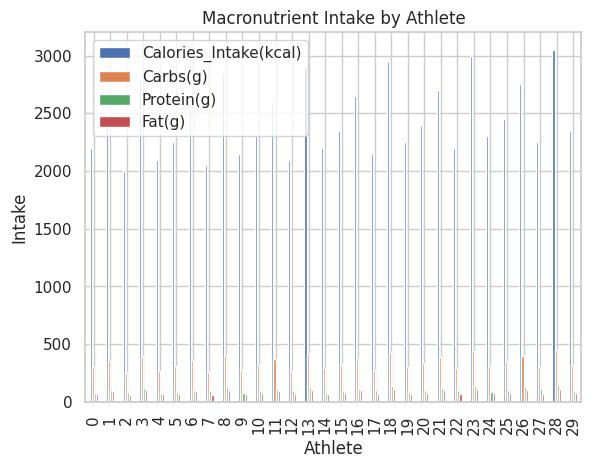

In [19]:
# Bar chart: Calorie and macronutrient intake by athlete
plt.figure(figsize=(12, 6))
data[['Calories_Intake(kcal)', 'Carbs(g)', 'Protein(g)', 'Fat(g)']].plot(kind='bar')
plt.title('Macronutrient Intake by Athlete')
plt.xlabel('Athlete')
plt.ylabel('Intake')
plt.show()


Calories Intake: The total calorie intake fluctuates over time, with peaks and troughs indicating periods of higher and lower energy consumption.

Carbohydrates, Protein, and Fat: These macronutrients also show variations over time, likely corresponding to changes in diet, training intensity, or specific dietary plans.

Trends: There may be periods where certain macronutrients (e.g., protein) are prioritized, possibly aligning with training cycles or performance goals.
Overall :
The graph provides a detailed view of an athlete's macronutrient intake over time, highlighting how their diet changes in response to training, competition, or other factors. The fluctuations in calorie and macronutrient intake suggest that the athlete may be adjusting their diet to meet specific performance or recovery needs. This type of data is crucial for optimizing nutrition to support athletic performance and overall health.

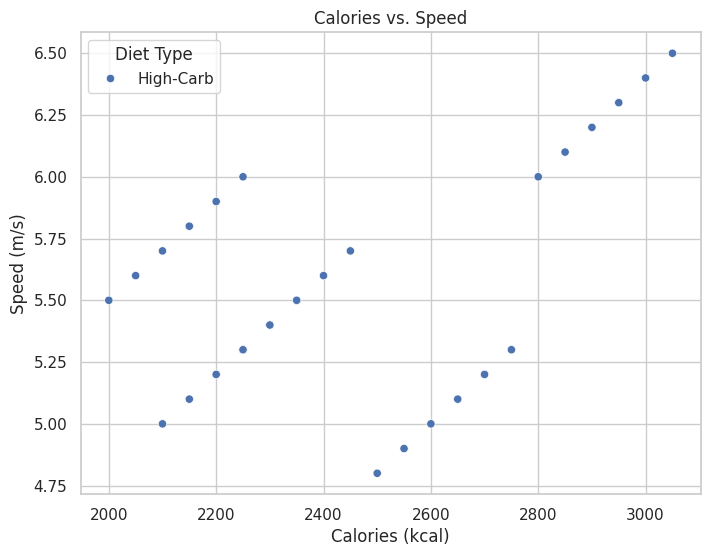

In [20]:

# Scatter plot: Calorie intake vs. speed
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Calories_Intake(kcal)', y='Speed(m/s)', data=data, hue='Diet_Type')
plt.title('Calories vs. Speed')
plt.xlabel('Calories (kcal)')
plt.ylabel('Speed (m/s)')
plt.legend(title='Diet Type')
plt.show()

this plot shows the relation between speed and calories intake by athlete,blue dot or marked indicates high-carb.here calories burn linearly with restpect to increase speed

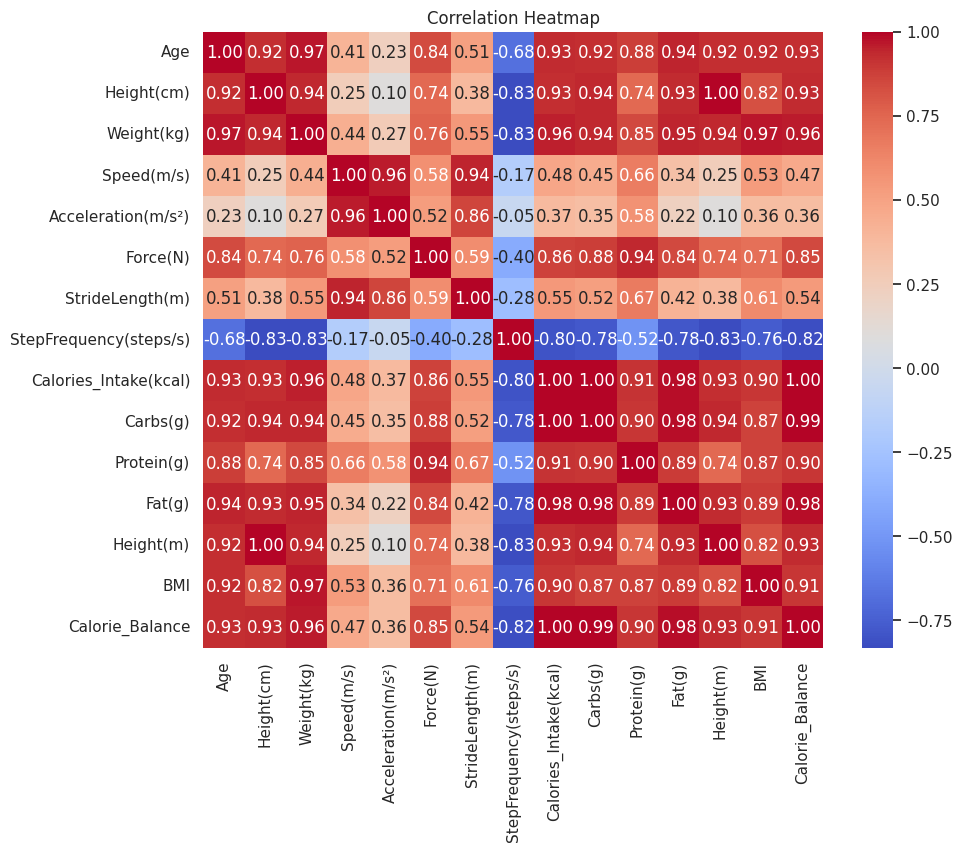

In [21]:
# Heatmap: Correlations
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()



Variables Included:

Age

Height (cm)

Weight (kg)

Speed (m/s)

Acceleration (m/s²)

Height (m)

Calories Intake (kcal)

Cards (g)

Protein (g)

Fat (g)

BMI

Calorie Balance

Key Observations:

Age shows strong positive correlations with Height (cm) (0.92), Weight (kg) (0.97), and BMI (0.93). This suggests that as age increases, height, weight, and BMI tend to increase as well.

Height (cm) and Weight (kg) are highly correlated (0.94), indicating that taller individuals tend to weigh more.

Speed (m/s) and Acceleration (m/s²) have a strong positive correlation (0.96), meaning that faster individuals tend to have higher acceleration.

Calories Intake (kcal) shows moderate correlations with Weight (kg) (0.76) and BMI (0.85), suggesting that higher calorie intake is associated with higher weight and BMI.

BMI has a strong positive correlation with Weight (kg) (0.96) and Calories Intake (kcal) (0.85), indicating that higher weight and calorie intake are associated with higher BMI.

Calorie Balance shows a strong positive correlation with Calories Intake (kcal) (0.94), suggesting that higher calorie intake is associated with a higher calorie balance.

Lower Correlations:

Age has lower correlations with Speed (m/s) (0.41) and Acceleration (m/s²) (0.23), indicating that age has a weaker relationship with speed and acceleration.

Height (m) and Calories Intake (kcal) have a moderate correlation (0.58), suggesting a moderate relationship between height and calorie intake.

Overall Interpretation:
The heatmap indicates that there are strong relationships between age, height, weight, and BMI. Speed and acceleration are also closely related. Caloric intake and balance are significantly correlated with weight and BMI. The data suggests that these variables are interconnected, with some showing stronger relationships than others. This information can be useful for understanding how different factors influence each other in the context of the dataset.